In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [391]:
df = pd.read_csv(r"C:\Users\mituc\Ironhack\Curso\IronLabs\California-cleanin\california.csv", index_col = 0)

'id',: id de la casa<br>
'state',: el estado al que pertenece<br>
'gender',: el género de la persona que alquila la casa<br>
'median_home_val',: el valor de la casa<br>
'median_household_income',:_ la mediana de la renta de la poblacion<br>
'ic2', poblacion de la zona<br>
'ic3', numero de vecinos en el bloque<br>
'ic4', total de habitaciones<br>
'ic5', total de baños<br>
'avggift',:_ distancia a la playa<br>
'target_d': esta variable no la usaremos, asi que la podeis elimina<br>

In [392]:
df.head(5)

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
0,44060,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN,100.0
1,96093,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667,7.0
2,43333,FL,F,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111,5.0
3,21885,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778,38.0
4,190108,FL,F,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000,5.0


In [357]:
df.shape

(3993, 11)

In [394]:
df.duplicated(subset=["id"]).sum()

0

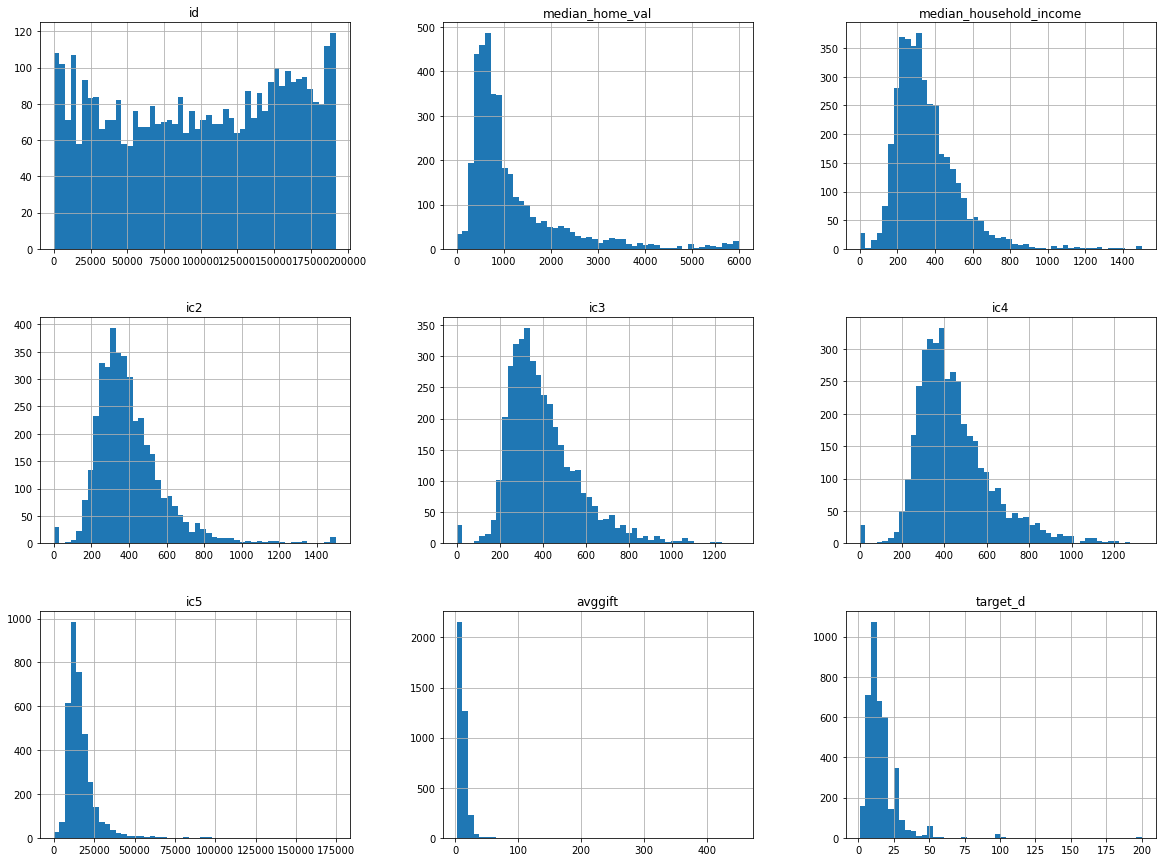

In [393]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [395]:
corr_matrix = df.corr()
corr_matrix["median_home_val"].sort_values(ascending=False)


median_home_val            1.000000
ic5                        0.744776
ic4                        0.742227
ic2                        0.737371
ic3                        0.732857
median_household_income    0.700940
id                         0.253189
avggift                    0.125058
target_d                   0.110053
Name: median_home_val, dtype: float64

In [396]:
df["rooms_per_neigh"] = df["ic4"]/df["ic3"]
df["baths_per_neigh"] = df["ic5"]/df["ic3"]
df["population_per_household"] = df["ic2"]/df["ic3"]


In [397]:
corr_matrix = df.corr()
corr_matrix["median_home_val"].sort_values(ascending=False)

median_home_val             1.000000
ic5                         0.744776
ic4                         0.742227
ic2                         0.737371
ic3                         0.732857
median_household_income     0.700940
baths_per_neigh             0.274009
id                          0.253189
avggift                     0.125058
target_d                    0.110053
population_per_household    0.096456
rooms_per_neigh            -0.076728
Name: median_home_val, dtype: float64

In [398]:
df.head(5)

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d,rooms_per_neigh,baths_per_neigh,population_per_household
0,44060,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN,100.0,1.115880,47.156652,0.922747
1,96093,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667,7.0,1.153659,47.285366,1.012195
2,43333,FL,F,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111,5.0,1.207756,52.180055,0.941828
3,21885,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778,38.0,1.035088,35.122807,1.020050
4,190108,FL,F,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000,5.0,1.101266,56.933544,0.886076


In [359]:
df.isnull().sum()

id                           0
state                        9
gender                       0
median_home_val            200
median_household_income    120
ic2                          8
ic3                         80
ic4                         40
ic5                        399
avggift                    280
target_d                     0
dtype: int64

In [360]:
df["gender"].unique()

array(['M', 'F', 'female', 'Male', 'U', 'J', 'male', 'Female', 'feamale',
       'A'], dtype=object)

In [361]:
f = ['female','Female','feamale']
m = ['Male','male']

for i in f:
    df["gender"] = df["gender"].str.replace(i, 'F')
for i in m:
    df["gender"] = df["gender"].str.replace(i,'M')

In [362]:
df["gender"].unique()

array(['M', 'F', 'U', 'J', 'A'], dtype=object)

In [363]:
df["gender"].value_counts()

F    2276
M    1625
U      68
J      23
A       1
Name: gender, dtype: int64

In [364]:
df["gender"].value_counts()[0]+df["gender"].value_counts()[1]

3901

In [365]:
g = ['U','J','A']

for i in g:
    df.drop(df[df["gender"] == i].index, inplace=True)

In [366]:
df["gender"].value_counts()

F    2276
M    1625
Name: gender, dtype: int64

In [367]:
df["state"].unique()

array(['FL', 'IL', 'NC', nan, 'NV', 'CA', 'Cali', 'AP', 'MI', 'MT', 'TX',
       'WI', 'MO', 'IN', 'HI', 'UT', 'GA', 'WA', 'CT', 'ND', 'SC', 'IA',
       'CO', 'LA', 'OR', 'SD', 'AL', 'TN', 'NM', 'AZ', 'MN', 'KY', 'OK',
       'NE', 'AR', 'KS', 'ID', 'California', 'MS', 'NY', 'Arizona', 'WY',
       'Tennessee', 'MD', 'AK', 'VA', 'AE', 'NJ', 'AA', 'PA', 'VT', 'WV',
       'GU'], dtype=object)

In [368]:
df["state"] = df["state"].str.replace('California', 'CA')
df["state"] = df["state"].str.replace('Cali', 'CA')
df["state"] = df["state"].str.replace('Arizona', 'AZ')
df["state"] = df["state"].str.replace('Tennessee', 'TN')


In [369]:
df["state"].unique()

array(['FL', 'IL', 'NC', nan, 'NV', 'CA', 'AP', 'MI', 'MT', 'TX', 'WI',
       'MO', 'IN', 'HI', 'UT', 'GA', 'WA', 'CT', 'ND', 'SC', 'IA', 'CO',
       'LA', 'OR', 'SD', 'AL', 'TN', 'NM', 'AZ', 'MN', 'KY', 'OK', 'NE',
       'AR', 'KS', 'ID', 'MS', 'NY', 'WY', 'MD', 'AK', 'VA', 'AE', 'NJ',
       'AA', 'PA', 'VT', 'WV', 'GU'], dtype=object)

In [370]:
df.isnull().sum()

id                           0
state                        8
gender                       0
median_home_val            196
median_household_income    118
ic2                          8
ic3                         77
ic4                         40
ic5                        391
avggift                    271
target_d                     0
dtype: int64

In [371]:
df.dropna(subset = ['state', 'ic2', 'ic3', 'ic4'], inplace = True)

In [372]:
df.isnull().sum()

id                           0
state                        0
gender                       0
median_home_val            194
median_household_income    116
ic2                          0
ic3                          0
ic4                          0
ic5                        375
avggift                    258
target_d                     0
dtype: int64

In [373]:
df_numericas = df.select_dtypes(include=np.number)

In [374]:
df_numericas = df_numericas.drop(['id', 'target_d'], axis = 1)

In [375]:
df_numericas.head(5)

,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift
0,1158.437751,392.0,430.0,466.0,520.0,21975.0,NaN
1,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667
2,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111
3,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778
4,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000


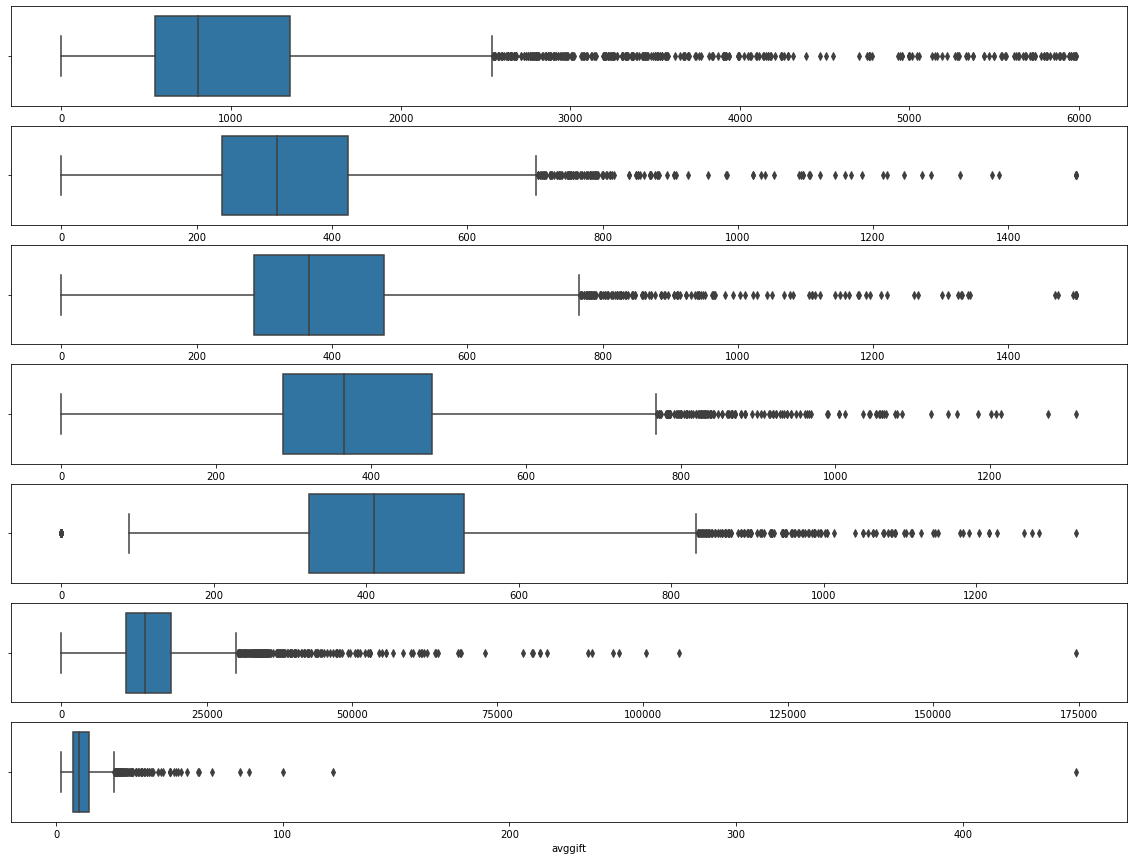

In [376]:
fig, ax = plt.subplots(7, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.show()

In [377]:
for i in df_numericas.columns:
    print(i,df_numericas[i].min())

median_home_val 0.0
median_household_income 0.0
ic2 0.0
ic3 0.0
ic4 0.0
ic5 0.0
avggift 2.260869565


In [378]:
df_numericas["avggift"].max()

450.0

In [379]:
df_numericas["ic5"].max()

174523.0

In [380]:
df_numericas["ic4"].min()

0.0

In [381]:
df.shape

(3770, 11)

In [382]:
df.drop(df[df['avggift'] == 450.0].index, inplace=True)

In [383]:
df.drop(df[df['ic5'] == 174523.0].index, inplace=True)

In [384]:
df.drop(df[df['ic4'] == 0.0].index, inplace=True)

In [385]:
df.shape

(3739, 11)

In [386]:
def outliers(df, col):
    """
    Calculates the interquartile range of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Returns:
        q1: value of the first quartile
        q2: value of the second quartile
        outlier_iqr: interquartile range
    """
    q1 = np.nanpercentile(df[col], 25)
    q3 = np.nanpercentile(df[col], 75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
    return q1, q3, outlier_step

def outliers_df(df, col):
    """
    Separates the outliers of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Methods:
        Uses the function outliers()
    Returns:
        outliers_data: dataframe with the outliers
    """
    outliers_data = df[(df[col] < outliers(df, col)[0] - outliers(df, col)[2]) | (df[col] > outliers(df, col)[1] + outliers(df, col)[2])]
    return outliers_data

def outliers_index(df, list_col):
    """
    Creates a list and a dictionary with the indexes of the outliers of a list of columns in a dataframe.
    
    Args:
        df (pandas Data Frame)
        list_col (list): list of strings with the names of the columns
    Methods:
        Uses the function outliers_df()
    Returns:
        dicc_index: dictionary with the name of the columns as keys and the indexes of the outliers as values
        outliers: list with the indexes of the outliers
    """
    dicc_index = {}
    for i in list_col:
        if outliers_df(df, i).shape[0] > 0:
            dicc_index[i] = list(outliers_df(df, i).index)
    outliers = list(set([i for sublist in list(dicc_index.values()) for i in sublist]))
    return dicc_index, outliers

In [387]:
outliers = outliers_index(df, df_numericas.columns)[1]

In [388]:
len(outliers)

500

In [389]:
df_no_outliers = df.drop(df.index[[outliers]])

C:\Users\mituc\anaconda3\envs\py39\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


IndexError: index 3746 is out of bounds for axis 0 with size 3739

In [ ]:
df_outliers = df.loc[outliers]

In [ ]:
df.shape

(3768, 11)

In [ ]:
df_outliers.head(5)

,id,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,target_d
3,21885,NC,M,1158.437751,401.0,407.0,399.0,413.0,14014.0,27.277778,38.0
2052,107569,NE,M,443.000000,231.0,288.0,281.0,323.0,11042.0,36.111111,50.0
9,141720,NV,F,1569.000000,673.0,672.0,785.0,781.0,25775.0,13.000000,5.0
10,186272,CA,F,3515.000000,521.0,565.0,549.0,588.0,20068.0,8.640000,10.0
2059,1068,CA,F,3528.000000,814.0,808.0,867.0,867.0,25564.0,6.162791,5.0


In [ ]:
df_outliers.shape

(533, 11)

In [ ]:
df_outliers.isnull().sum()

id                          0
state                       0
gender                      0
median_home_val            16
median_household_income    19
ic2                         0
ic3                         0
ic4                         0
ic5                        46
avggift                    32
target_d                    0
dtype: int64

In [ ]:
df_outliers.to_csv(r"C:\Users\mituc\Ironhack\Curso\IronLabs\California-cleanin\california_outliers.csv")